## 3.2. Linear Regression from Scratch

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 3.2.1 Generate the Dataset
$$
\textbf{y} = \textbf{Xw} + b + ϵ
$$

In [5]:
def synthetic_data(w, b, num_examples): #@save
  "生成y=Xw+b+噪声"
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [6]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-2.2142,  0.6545]) 
label: tensor([-2.4695])


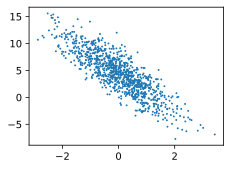

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

### 3.2.2 Reading Datasets

In [8]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # 这些样本是随机读取的，没有特定的顺序
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(
      indices[i: min(i + batch_size, num_examples)]
    )
    yield features[batch_indices], labels[batch_indices]

In [10]:
batch_size = 10

for X, y in data_iter(batch_size=batch_size, features=features, labels=labels):
  print(X, '\n', y)
  break

tensor([[ 0.3445, -2.2807],
        [ 0.5182, -1.8748],
        [ 0.2543,  0.4219],
        [-1.1115, -1.2926],
        [-1.1685,  0.4865],
        [-0.8878, -1.0161],
        [-1.0358, -2.1366],
        [-0.6438, -1.1650],
        [ 0.2737,  0.2198],
        [ 1.0113, -0.8041]]) 
 tensor([[12.6376],
        [11.6024],
        [ 3.2757],
        [ 6.3530],
        [ 0.2065],
        [ 5.9115],
        [ 9.3776],
        [ 6.9045],
        [ 4.0070],
        [ 8.9643]])


### 3.2.3 Initialize Model and Parameters

In [11]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 3.2.4 Define the Model

In [12]:
def linreg(X, w, b): #@save
  """线性回归模型"""
  return torch.matmul(X, w) + b

### 3.2.5 Define Loss Function

In [13]:
def squared_loss(y_hat, y): #@save
  """均方损失"""
  return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 3.2.6 Define Optimization Algorithm

In [14]:
def sgd(params, lr, batch_size): #@save
  """小批量随机梯度下降"""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

### 3.2.7 Training

In [18]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y) # X 和 y的小批量损失
    # 因为l形状是（batch_size,1), 而不是一个标量，l中所有的元素被加到一起，
    # 并以此计算[w, b]的梯度
    print(f'l:{l}')
    l.sum().backward()
    sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

l:tensor([[1.2131e-04],
        [6.6881e-06],
        [1.4770e-05],
        [5.8266e-06],
        [3.8204e-05],
        [9.6895e-06],
        [5.0426e-06],
        [1.2033e-05],
        [3.6549e-05],
        [7.4351e-06]], grad_fn=<DivBackward0>)
l:tensor([[5.2926e-05],
        [5.6358e-05],
        [2.2323e-04],
        [4.5603e-06],
        [4.6261e-06],
        [1.6678e-07],
        [2.2344e-06],
        [1.0644e-04],
        [5.4064e-06],
        [2.9140e-05]], grad_fn=<DivBackward0>)
l:tensor([[5.4625e-07],
        [2.9527e-05],
        [1.1496e-04],
        [2.6852e-08],
        [1.7783e-05],
        [1.7352e-04],
        [1.7605e-05],
        [1.6151e-05],
        [1.4746e-05],
        [1.4450e-05]], grad_fn=<DivBackward0>)
l:tensor([[1.4256e-05],
        [1.0088e-05],
        [4.4097e-06],
        [1.4013e-06],
        [1.9773e-05],
        [6.2605e-05],
        [2.3761e-05],
        [1.0925e-04],
        [1.0741e-05],
        [8.7212e-05]], grad_fn=<DivBackward0>)
l:tensor([[1

In [16]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([-6.4492e-04, -7.4625e-05], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0007], grad_fn=<RsubBackward1>)
